# In Simple Steps: Classification Tree

## 0 - Introduction

* This is a Classification Tree project of a dataset for heart disease prediction. I got this dataset from *UC Irvine Machine Learning Repository*.  
* UCI link for this dataset: "https://archive.ics.uci.edu/ml/datasets/Heart+Disease"  
* The goal of this project is to build a Classification Tree model that can predict the probability of a patient having heart disease or not from the features in this dataset.

**Credits to the creators of this dataset**

I want to give credits to the following institutions and persons who created and made available this dataset to everyone.

Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:  
1. David W. Aha (www.ics.uci.edu)

## 1 - Exploratory Data Analysis  
This is the first step in any Data Science or Machine Learning project. This step helps us underatand the data because in this step, we can explore and visualize our data, we analyze it using statistics

### 1.1 - Importing the Libraries

In [71]:
import pandas as pd # for data preprocessing
import numpy as np # for Math and Linear Algebra
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from tqdm import tqdm # Progress bar

import warnings # this will ignore the warnings and won't showup in the code cell output
warnings.filterwarnings('ignore')

# to view graphs in jupyter notebook 
%matplotlib inline

### 1.2 - Setting display options  
This is an optional step.

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100
pd.options.display.precision = 5
pd.options.display.float_format = '{:.3f}'.format
sns.set_style("whitegrid") # seaborn plot styles: {darkgrid, whitegrid, dark, white, ticks}

### 1.3 - Importing the data

In [3]:
df = pd.read_csv('processed.cleveland.data.csv', header = None)

# This datafile file can also be imported directly from the UCI portal thru the following 2 lines of code.
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
# df = pd.read_csv(url, header = None)

df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.300,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.500,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.600,2,2,7,1


The dataset does not have column names so the above dataframe gives column numbers instead. Replacing the column numbers with column names would make it easier to uderstand the dataframe and so wasier to work with it. I collected the following attribite info from the dataset web page and will use the attribute names (with minor changes) as the column names.

**Attribute Information:**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    -- Value 1: upsloping
    -- Value 2: flat
    -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num (the predicted attribute): diagnosis of heart disease (angiographic disease status)
    -- Value 0: < 50% diameter narrowing
    -- Value 1: > 50% diameter narrowing

In [4]:
df.columns = ["age","sex","cp","restbp","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","hd"]

### 1.4 - Previewing the data

In [5]:
df.head(3) # Checking a few rows of the dataset to get a glimpse of what the actual data looks like.

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.300,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.500,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.600,2,2,7,1


In [6]:
df.shape

(303, 14)

The dataset has 303 rows and 14 columns.

In [7]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.439,0.680,3.158,131.690,246.693,0.149,0.990,149.607,0.327,1.040,1.601,0.937
std,9.039,0.467,0.960,17.600,51.777,0.356,0.995,22.875,0.470,1.161,0.616,1.229
min,29.000,0.000,1.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,1.000,0.000
25%,48.000,0.000,3.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000
50%,56.000,1.000,3.000,130.000,241.000,0.000,1.000,153.000,0.000,0.800,2.000,0.000
75%,61.000,1.000,4.000,140.000,275.000,0.000,2.000,166.000,1.000,1.600,2.000,2.000
max,77.000,1.000,4.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,3.000,4.000


In [10]:
df_int_col = df.select_dtypes(include = 'int64').columns.to_list()

In [11]:
df[df_int_col] = df[df_int_col].astype('int16')
df["oldpeak"] = df["oldpeak"].astype('float16')

**Checking for duplicate rows**

In [20]:
df[df.duplicated() == True]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd


Detect Outliers

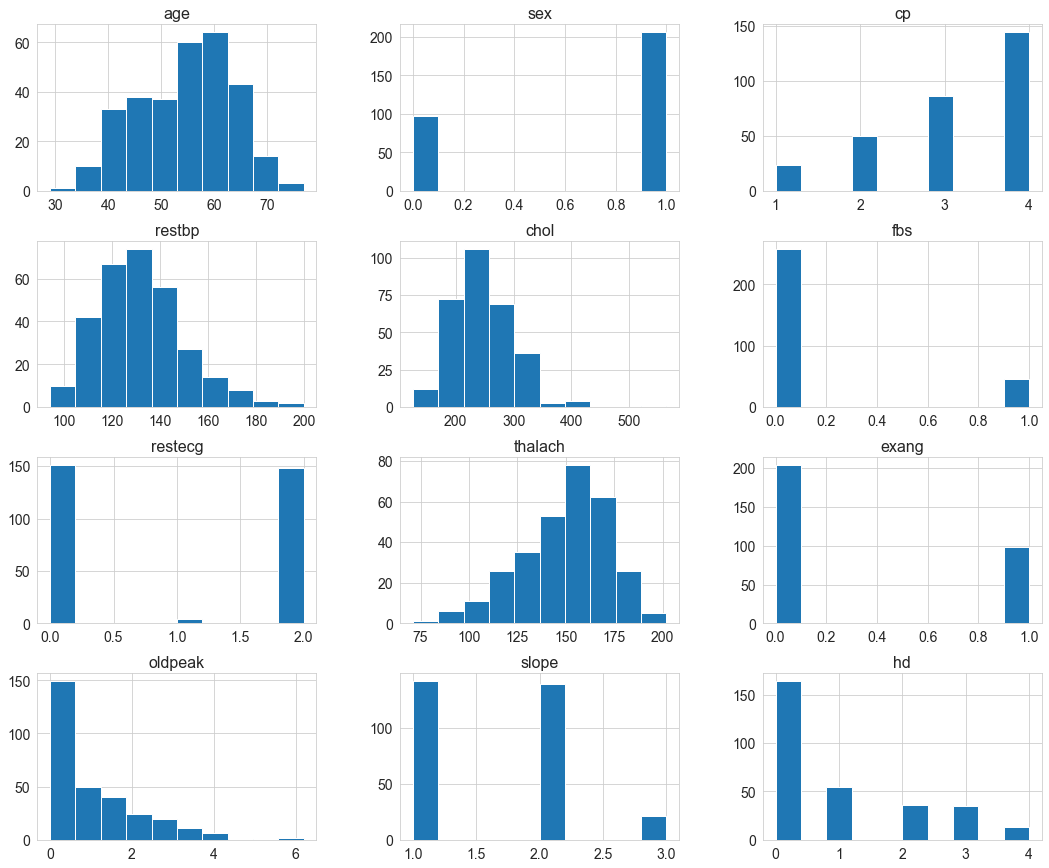

In [42]:
params = {'axes.titlesize':16,
          'xtick.labelsize':14,
          'ytick.labelsize':14}
plt.rcParams.update(params)

df.hist(figsize = (18, 15))
plt.show()

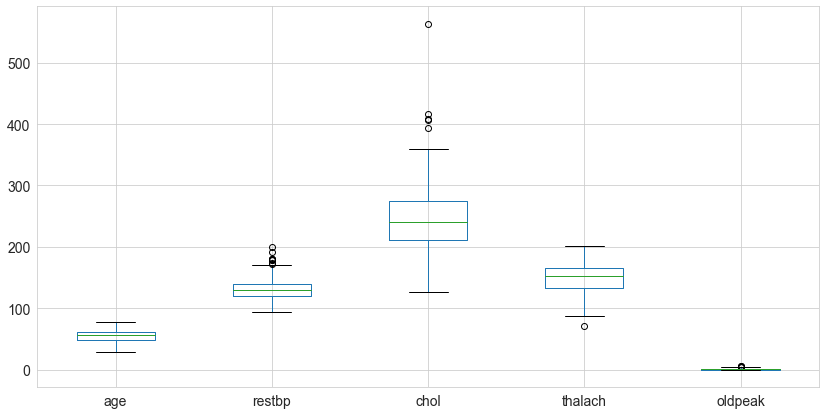

In [58]:
params = {'xtick.labelsize':14,
          'ytick.labelsize':14}
plt.rcParams.update(params)
df[['age','restbp','chol','thalach','oldpeak']].boxplot(figsize = (14, 7))
#df[['oldpeak']].boxplot(figsize = (16, 8))
plt.show()

In [86]:
df.oldpeak.unique()

array([2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0. , 0.5,
       1.6, 1. , 1.2, 0.2, 1.8, 3.2, 2.4, 2. , 2.5, 2.2, 2.8, 3. , 3.4,
       6.2, 4. , 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3,
       4.4])

In [79]:
print(np.sort(df.oldpeak.unique()))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.8 2.9 3.  3.1 3.2 3.4 3.5 3.6 3.8 4.
 4.2 4.4 5.6 6.2]


In [92]:
pd.value_counts(df.oldpeak)

0.000    99
1.200    17
0.600    14
1.000    14
1.400    13
0.800    13
0.200    12
1.600    11
1.800    10
2.000     9
0.400     9
0.100     7
2.800     6
2.600     6
1.900     5
0.500     5
3.000     5
1.500     5
3.600     4
2.200     4
3.400     3
0.900     3
2.400     3
0.300     3
4.000     3
1.100     2
4.200     2
2.300     2
2.500     2
3.200     2
5.600     1
2.900     1
6.200     1
2.100     1
1.300     1
3.100     1
3.800     1
0.700     1
3.500     1
4.400     1
Name: oldpeak, dtype: int64

In [93]:
type(pd.value_counts(df.oldpeak))

pandas.core.series.Series

In [89]:
from scipy.stats import itemfreq
itemfreq(df.oldpeak)

array([[ 0. , 99. ],
       [ 0.1,  7. ],
       [ 0.2, 12. ],
       [ 0.3,  3. ],
       [ 0.4,  9. ],
       [ 0.5,  5. ],
       [ 0.6, 14. ],
       [ 0.7,  1. ],
       [ 0.8, 13. ],
       [ 0.9,  3. ],
       [ 1. , 14. ],
       [ 1.1,  2. ],
       [ 1.2, 17. ],
       [ 1.3,  1. ],
       [ 1.4, 13. ],
       [ 1.5,  5. ],
       [ 1.6, 11. ],
       [ 1.8, 10. ],
       [ 1.9,  5. ],
       [ 2. ,  9. ],
       [ 2.1,  1. ],
       [ 2.2,  4. ],
       [ 2.3,  2. ],
       [ 2.4,  3. ],
       [ 2.5,  2. ],
       [ 2.6,  6. ],
       [ 2.8,  6. ],
       [ 2.9,  1. ],
       [ 3. ,  5. ],
       [ 3.1,  1. ],
       [ 3.2,  2. ],
       [ 3.4,  3. ],
       [ 3.5,  1. ],
       [ 3.6,  4. ],
       [ 3.8,  1. ],
       [ 4. ,  3. ],
       [ 4.2,  2. ],
       [ 4.4,  1. ],
       [ 5.6,  1. ],
       [ 6.2,  1. ]])

In [ ]:
# Correlation Matrix between independent features and dependent feature

In [94]:
df.corr()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
age,1.000,-0.098,0.104,0.285,0.209,0.119,0.149,-0.394,0.092,0.204,0.162,0.223
sex,-0.098,1.000,0.010,-0.064,-0.200,0.048,0.022,-0.049,0.146,0.102,0.038,0.224
cp,0.104,0.010,1.000,-0.036,0.072,-0.040,0.068,-0.334,0.384,0.202,0.152,0.407
restbp,0.285,-0.064,-0.036,1.000,0.130,0.175,0.147,-0.045,0.065,0.189,0.117,0.158
chol,0.209,-0.200,0.072,0.130,1.000,0.010,0.171,-0.003,0.061,0.047,-0.004,0.071
fbs,0.119,0.048,-0.040,0.175,0.010,1.000,0.070,-0.008,0.026,0.006,0.060,0.059
restecg,0.149,0.022,0.068,0.147,0.171,0.070,1.000,-0.083,0.085,0.114,0.134,0.184
thalach,-0.394,-0.049,-0.334,-0.045,-0.003,-0.008,-0.083,1.000,-0.378,-0.343,-0.386,-0.415
exang,0.092,0.146,0.384,0.065,0.061,0.026,0.085,-0.378,1.000,0.288,0.258,0.397
oldpeak,0.204,0.102,0.202,0.189,0.047,0.006,0.114,-0.343,0.288,1.000,0.578,0.504


<AxesSubplot:>

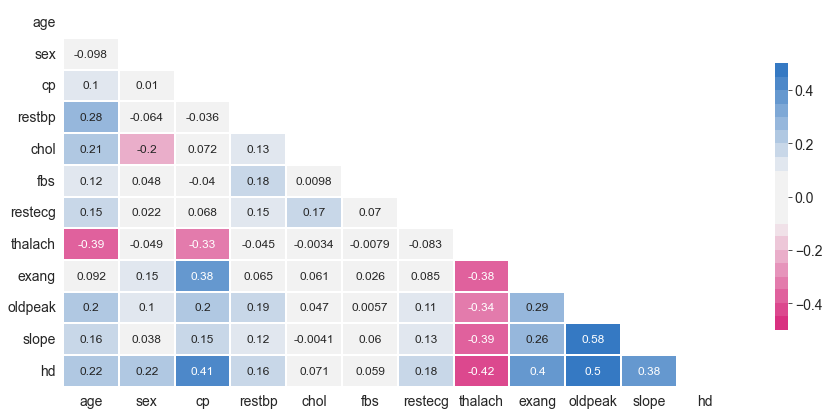

In [312]:
plt.figure(figsize = (15,7))
cmap = sns.diverging_palette(h_neg = 350, h_pos = 250, s = 85, l = 50, sep = 50, n = 20, center = 'light', as_cmap = False)

matrix = np.triu(df.corr())

sns.heatmap(df.corr(), vmin = -.5, vmax = .5, cmap = cmap, center = 0, annot = True, annot_kws = {'size': 12}, 
            linewidths = 0.1, linecolor = 'white', cbar = True, cbar_kws = {"shrink": .7}, square = False,
            xticklabels = 1, yticklabels = 1, mask = matrix)

In [254]:
matrix_2 = np.triu(np.ones_like(df.corr()))
matrix_2

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

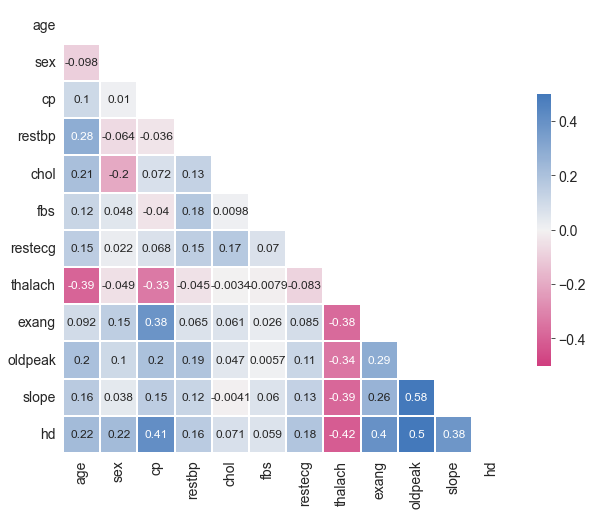

In [255]:
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(350, 250, as_cmap = True)

sns.heatmap(df.corr(), vmin = -.5, vmax = .5, cmap = cmap, center = 0, annot = True, annot_kws = {'size': 12}, 
            linewidths = 0.1, linecolor = 'white', cbar = True, cbar_kws = {"shrink": .5}, square = True,
            xticklabels = 1, yticklabels = 1, mask = matrix_2)

In [313]:
df_cat = df[['ca','thal']]

Graph for ca: total = 5


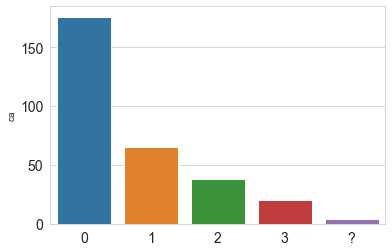

Graph for thal: total = 4


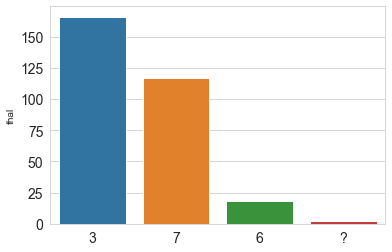

In [319]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

High-level Statistics

distribution of Numerical data

count distribution of Categorical data

Univariate, Bivariate, and Multivariate EDA

Data visualization

### 1.5 - Missing data

#### 1.5.1 - Identifying missing data

In [12]:
# Checking data types and null values in each column using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int16  
 1   sex      303 non-null    int16  
 2   cp       303 non-null    int16  
 3   restbp   303 non-null    int16  
 4   chol     303 non-null    int16  
 5   fbs      303 non-null    int16  
 6   restecg  303 non-null    int16  
 7   thalach  303 non-null    int16  
 8   exang    303 non-null    int16  
 9   oldpeak  303 non-null    float16
 10  slope    303 non-null    int16  
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int16  
dtypes: float16(1), int16(11), object(2)
memory usage: 12.0+ KB


**Observations:** From the above info, we can see that there are no `null` values in this dataset, but 'ca' and 'thal' columns are 'object' type and need more investigation.

In [13]:
# Checking unique values in 'ca'
df['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

'ca' column has '0, 1, 2, 3 and 0' values where '0, 1, 2, 3' represents number of blood vessels and '?' represents missing data.

In [14]:
# Checking unique values in 'thal'
df['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

'thal' column also has numbers and '?' representing missing data.

#### 1.5.2 - Dealing with missing data  
Scikit-learn Classification Trees do not support datasets with missing values so we will have to take care of all the missing values.  
There are two options for us,  
- delete all the rows with missing data if the # of rows to be deleted are very few compared to the total # of rows  
- impute values for the missing data, if the # of rows to be deleted are large compared to the total # of rows

In [15]:
# Finding out total # of rows with missing data
df[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53,0,3,128,216,0,2,115,0,0.000000,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.000000,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.099976,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.000000,2,0,?,2
287,58,1,2,125,220,0,0,144,0,0.399902,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.000000,1,?,3,0


In [18]:
# If there are many rows, we can count the # of rows with the following line of code
len(df[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [16]:
# Counting # of rows in the dataset
len(df)

303

So 6 out of 303 rows have missing values. This is about 2% of the data which is a very small # and so we can delete these rows from our dataframe.

In [19]:
# Dataset without the missing values
df_no_miss = df[(df['ca'] != '?') & (df['thal'] != '?')]
len(df_no_miss)

297

So we now have 297 rows of data in our dataset that we can use in building our Classification Tree model.

## 2 - Formatting the data for Decision Trees  
We will format the data to build a *Classification Tree*.

### 2.1 - Format the data part 1: Split the data into two parts, X and y.

#### 2.1.1 - Columns of data that we will use to make our Classification Tree. We will denote with 'X'.

In [20]:
X = df_no_miss.drop(columns = 'hd') # Independent variables to build our tree (to make predictions)

In [21]:
X.head(3)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.300781,3,0,6
1,67,1,4,160,286,0,2,108,1,1.500000,2,3,3
2,67,1,4,120,229,0,2,129,1,2.599609,2,2,7


#### 2.1.2 - Column of data that we want to predict. We want to predict `hd` (heart disease). We will denote it with 'y'.

In [22]:
y = df_no_miss['hd'] # Dependnet or target variable that we want to predict

In [23]:
y.head(3)

0    0
1    2
2    1
Name: hd, dtype: int16

### 2.2 - Format the data part 2: One-Hot Encoding

As we have now started working on our Tree, we should take a look at the parameters in X & y.

*X: Check each variable in X for their actuall data types and what they should be for our model building.*  

1. age: age in years (*It is `int` and should be `int`.*)  
2. sex: sex (*It is `int` but should be `categorical`.*)  
    - 0 = female  
    - 1 = male  
3. cp: chest pain type (*It is `int` but should be `categorical`.*)  
    - 1: typical angina  
    - 2: atypical angina  
    - 3: non-anginal pain  
    - 4: asymptomatic   
4. restbp: resting blood pressure (in mm Hg on admission to the hospital) (*It is `int` and should be `int`.*)      
5. chol: serum cholestoral in mg/dl (*It is `int` and should be `int`.*)  
    
6. fbs: fasting blood sugar (*It is `int` but should be `categorical`.*)  
    - 0 = false (>= 120 mg/dl)  
    - 1 = true (< 120 mg/dl)  
7. restecg: resting electrocardiographic results (*It is `int` but should be `categorical`.*)  
    - 0: normal  
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
8. thalach: maximum heart rate achieved (*It is `int` and should be `int`.*)  
9. exang: exercise induced angina (*It is `int` but should be `categorical`.*)  
    - 0 = no    
    - 1 = yes  
10. oldpeak: ST depression induced by exercise relative to rest (*It is `float` and should be `float`.*)  
11. slope: the slope of the peak exercise ST segment (*It is `int` but should be `categorical`.*)  
    - 1: upsloping  
    - 2: flat  
    - 3: downsloping  
12. ca: number of major vessels (0-3) colored by flourosopy (*It is `object` but should be `categorical`.*)  
    - 0  
    - 1  
    - 2  
    - 3  
13. thal: (*It is `object` but should be `categorical`.*)  
    - 3 = normal  
    - 6 = fixed defect  
    - 7 = reversable defect  

Scikit-learn Decision Trees natively support continuous data, they do not support categorical data. So to use categorical data with Scikit-learn Decision Trees, we have to convert each categorical column into multipal columns of binary values using *One-Hot Encoding* method. There are different ways to do *One-Hot Encoding*, I will use `get_dummies()` function from Pandas.

In [24]:
# I am using get_dummies() function on the four categorical variables that have more than 2 categories.
X_encoded = pd.get_dummies(X, columns = ['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1,...,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7
0,63,1,145,233,1,150,0,2.300781,0,1,...,0,0,0,1,0,0,1,0,1,0
1,67,1,160,286,0,108,1,1.500000,3,0,...,1,0,0,1,0,1,0,1,0,0
2,67,1,120,229,0,129,1,2.599609,2,0,...,1,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.500000,0,0,...,0,1,0,0,0,0,1,1,0,0
4,41,0,130,204,0,172,0,1.400391,0,0,...,0,0,0,1,1,0,0,1,0,0


A point is to be noted here that any categorical variable with 2 categories (values = 0 and 1), there may be missing values or values other than 0 and 1 such as '?', 'na', etc... This should be verified using Pandas `unique()` function which would give unique values in each column.

*y: Check the variable in y for its actuall data type and what it should be for our model building.*  

14. num (the predicted attribute): diagnosis of heart disease (angiographic disease status) (*It is `int` but should be `categorical`.*)  
    - 0 = < 50% diameter narrowing  
    - 1 = > 50% diameter narrowing  

In [25]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int16)

`y` has 5 different values for differelt levels of heart disease where *0 is for no heart disease* and *1 ~ 4 is for various level of heart disease*. In this project I am building a simple tree to classify if a patient has heart disease or not. So I will convert all numbers to 0 and 1 where *0 being no heart disease* and *1 ~ 4 for presence of heart disease*.

In [26]:
y_234_index = y > 1 # index for 2, 3, 4 values in y
y[y_234_index] = 1 # change values of 2, 3, 4 in y to 1
y.unique()

array([0, 1], dtype=int16)

**We now have finished formatting our data to make a Classification Tree so we can start building our Tree**

## 3 - Build a Decision Tree for Classification  

This will be preliminary Classification Tree. After reviewing the performance, if there is any room for improvements, we will try to optimize it by tweaking some parameters.

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size = 0.75, random_state = 10)

# Create a Decision Tree
clf_dt = DecisionTreeClassifier(random_state = 10)

# Fit the Decision Tree to the training data
clf_dt = clf_dt.fit(X_train, y_train)

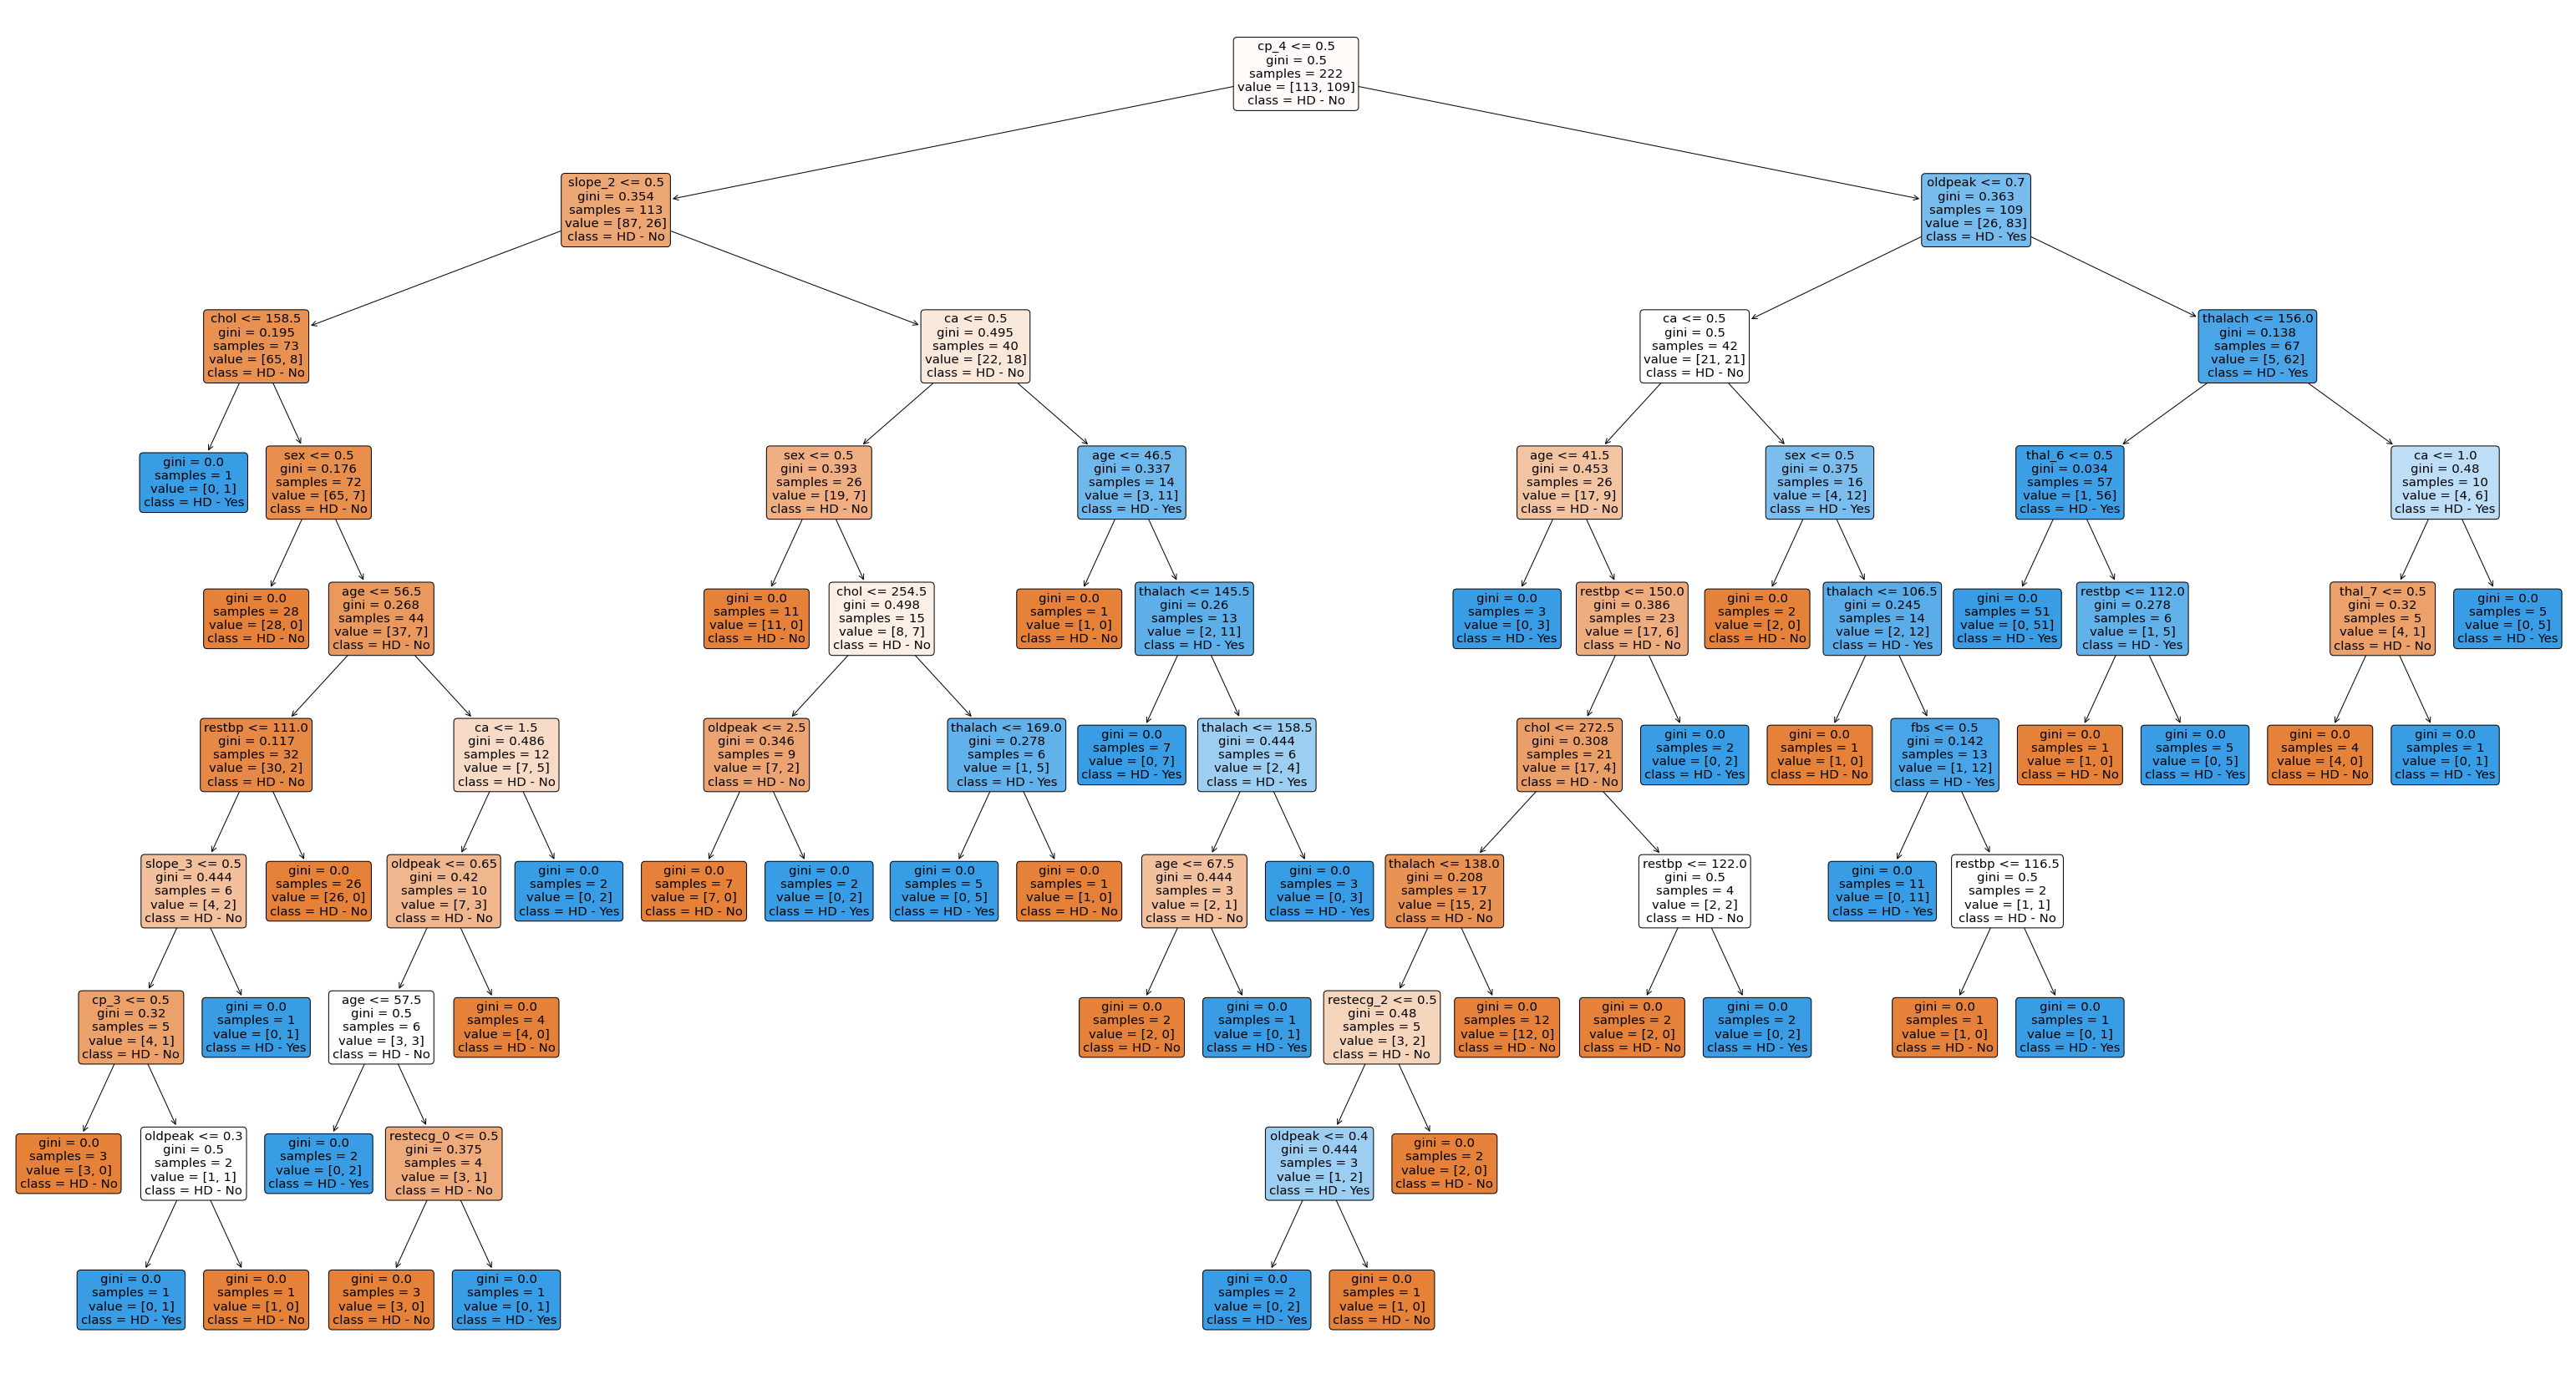

In [47]:
# Plot the Tree
# I have set the figsize huge (55, 30) to make the words in the colored boxes readable when the tree image is enlarged to the 
# maximum size.
plt.figure(figsize = (55, 30))
plot_tree(clf_dt, filled = True, rounded = True, class_names = ['HD - No','HD - Yes'],
          feature_names = X_encoded.columns)
plt.show()

We ae now checking how our newly created Classification Tree performs on the *Testing dataset*. The following line of code will plot the *Confusion Matrix* with the Classification Tree and Test data.

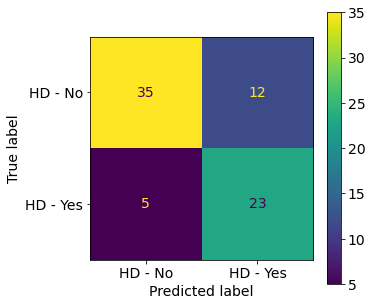

In [79]:
# Plot Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 14})
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ["HD - No","HD - Yes"], cmap = 'viridis', ax = ax)
plt.show()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
https://stackoverflow.com/questions/59839782/confusion-matrix-font-size

- In the above confusion matrix:  
    - *35 + 12 = 47* patients did not have Heart Disease and *35 (74.46%) were correctly classified*  
    - *5 + 23 = 28* patients did have Heart Disease and *23 (82.14%) were correctly classified*  
- We can improve the preformance of the tree because it may have *overfit* the training data. We can solve the overfitting problem by a technique called prunning. After pruning the tree, we may get a better result.

### 3.1 Optimization of the Tree

We built this tree with 

#### 3.1.1 - Cost Complexity Pruning Part 1: Visualize alpha  
We can improve the performance (accuracy) of the tree by tweaking many parameters (*criterion, max_dept, min_samples_split, etc...*), which could become too complex. On the other hand, *Cost Complexity Pruning* is a much simpler process of pruning a tree. This would give us a smaller tree with improved accuracy on the Testing dataset.

    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0,

ccp_alpha : non-negative float, default=0.0
    Complexity parameter used for Minimal Cost-Complexity Pruning. The
    subtree with the largest cost complexity that is smaller than
    ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
    :ref:`minimal_cost_complexity_pruning` for details.

**To be corrected**  
In the DecisionTreeClassifier(), alpha (ccp_alpha) is the pruning parameter and controls the pruning size. To find the best value of alpha for our analysis / project, we will plot accuracy of the tree for various values. We will work on Training and Testing datasets.

In [30]:
# The following line will output a dictionary of 2 arrays, 'ccp_alphas' and 'impurities' with all values in ascending 
# order in both the arrays.
ccp_path = clf_dt.cost_complexity_pruning_path(X_train, y_train)

# The following line will extract values of alpha which are in the 'ccp_alphas' array.
ccp_alph = ccp_path.ccp_alphas

# We will remoce the maximum value of alpha because it would prune all leaves with only the root remaining instead of a tree.
ccp_alph = ccp_alph[:-1]

# I used this line to enlarge the plot to pinpoint values of Training dataset, Testing dataset and alpha on the plot.
# ccp_alph = ccp_alph[16:-7]

In [31]:
clf_dts = [] # Array to store decision trees

# Create one tree per value of alpha and store it in the array
for alph in ccp_alph:
    clf_dt = DecisionTreeClassifier(random_state = 10, ccp_alpha = alph)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Ploting a graph of the trees using Training and Testing datasets

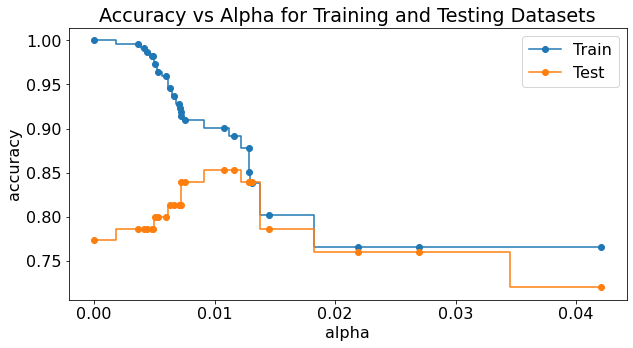

In [32]:
train_scores, test_scores = [], []

for val in clf_dts:
    train_scores.append(val.score(X_train, y_train))
    
for val in clf_dts:
    test_scores.append(val.score(X_test, y_test))

fig, ax = plt.subplots(figsize = (10, 5))
#plt.rcParams.update({'font.size': 14})

ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing Datasets")
ax.plot(ccp_alph, train_scores, marker = 'o', label = "Train", drawstyle = "steps-mid")
ax.plot(ccp_alph, test_scores, marker = 'o', label = "Test", drawstyle = "steps-mid")
ax.legend()
plt.show()

From the above graph. we can see that the full size tree when alpha = 0, accuracy of the Training dataset is almost 1 which is the best but it is not so well for the Testing dataset which is about 0.77. As the alpha increases (we are pruning the tree) the tree becomes smaller and the Testing accuracy improves with reduction in the Training accuracy.  

At alpha of about **0.011**, accuracy of Testing dataset is the maximum which is 0.85 and that of the Training dataset is .90. This is the best value of ccp_alpha so we will use it for our tree.

#### 3.1.2 - Cost Complexity Pruning Part 2: Cross Validation for finding the best alpha  

In the Cost *Complexity Pruning Part 1* above, we used one set of Training and Testing dataset each and we split only once. It is possible that a different version of both datasets may give us a better accuracy. We can find out the best datasets with *10-Fold Cross Validation*.

In the below lines of code, we will use `cross_val_score()` function that will generate different sets of Training and Testing data and train and test the tree using these different sets of data.

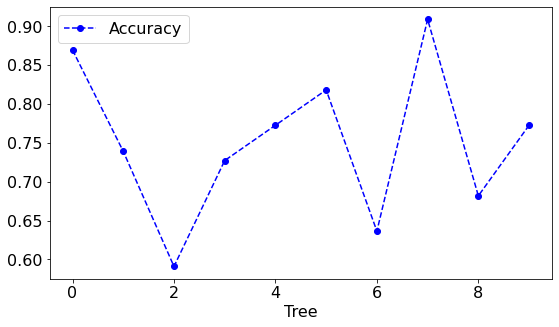

In [33]:
# Create a tree with ccp_alpha = 0.011
clf_dt = DecisionTreeClassifier(random_state = 10, ccp_alpha = 0.011)

# 10-Fold Cross Validation
scores = cross_val_score(clf_dt, X_train, y_train, cv = 10)

# Converting *scores* list into a dataframe
scores_df = pd.DataFrame(data = {'Tree': range(len(scores)), 'Accuracy':scores})

plt.rcParams['figure.figsize'] = [9, 5]
scores_df.plot(x = 'Tree', y = 'Accuracy', marker = 'o', linestyle = 'dashed', color = 'b')
plt.show()

From the above plot, we can see the the *accuracy* varies from *0.60 to 0.90* in 10 sets of Train and test data for the same value of alpha (*0.011*).  

We will find the optimal Test and Train datasets using *cross validation* for ccp_alpha in the following lines of code. Here, we will use `cross_val_score()` function for each value of alpha in the *ccp_alph* list.

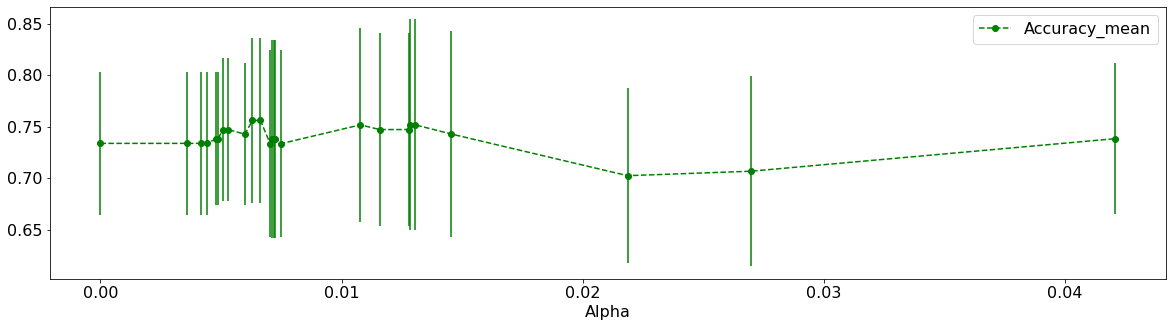

In [34]:
# Array to store the results of each fold from cross validation
alpha_values_cross_val = []

# For each value of alpha, we will run 10-Fold Cross Validation
for alph in ccp_alph:
        # Building a tree for one value of alpha
    clf_dt = DecisionTreeClassifier(random_state = 10, ccp_alpha = alph)
        # 10-Fold Cross Validation for one value of alpha
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 10)
    alpha_values_cross_val.append([alph, np.mean(scores), np.std(scores)])

# Plot the means and standard deviations of the scores for each value of alpha
# Converting 'alpha_values_cross_val' list into a dataframe
alpha_values_cross_val_DF = pd.DataFrame(alpha_values_cross_val, columns = ['Alpha','Accuracy_mean','std'])

plt.rcParams['figure.figsize'] = [20, 5]

# Ploting alpha_values_cross_val
alpha_values_cross_val_DF.plot(x = 'Alpha', y = 'Accuracy_mean', yerr = 'std', marker = 'o', linestyle = 'dashed', color = 'g')
plt.show()

Above plot is the result of *cross validation* and we can see that *ccp_alpha of about 0.013* would give us a better accuracy than our *chosen ccp_alpha value of 0.011*. We can find the exact value from the following lines of code.

In [35]:
alpha_values_cross_val_DF[(alpha_values_cross_val_DF['Alpha'] > 0.010) & (alpha_values_cross_val_DF['Alpha'] < 0.015)]

,Alpha,Accuracy_mean,std
16,0.010781,0.751779,0.094214
17,0.011583,0.747233,0.094190
18,0.012813,0.747233,0.094190
19,0.012859,0.751779,0.102612
20,0.013062,0.751779,0.102612
21,0.014553,0.742885,0.100221


In the above table, index# 19 & 20 rows have the highest values of Accuracy_mean and std. I will store both rows as the ideal values of alpha to build the best tree.

In [36]:
#ideal_ccp_alpha = alpha_values_cross_val_DF.iloc[19:21]['Alpha'].reset_index()
ideal_ccp_alpha = alpha_values_cross_val_DF.iloc[19:21]['Alpha']
print(ideal_ccp_alpha, type(ideal_ccp_alpha))

19    0.012859
20    0.013062
Name: Alpha, dtype: float64 <class 'pandas.core.series.Series'>


In [37]:
ideal_ccp_alpha = ideal_ccp_alpha.tolist()
print(ideal_ccp_alpha, type(ideal_ccp_alpha))

[0.012859012859012862, 0.013061556539817401] <class 'list'>


In [38]:
# ccp_alpha must be non-negative float, so checking it in this line
print(ideal_ccp_alpha[0], type(ideal_ccp_alpha[0]))
print(ideal_ccp_alpha[1], type(ideal_ccp_alpha[1]))

0.012859012859012862 <class 'float'>
0.013061556539817401 <class 'float'>


We finally have the *ideal values of alpha* (`ideal_ccp_alpha`) which we can use for `ccp_alpha` and can build our *final Classification Tree*.

## 4 - Build the Final Classification Tree  

There are 2 values of `ideal_ccp_alpha` so I will build 2 trees and compare if there is any difference in the outcome of the accuracies.

**First tree with `ideal_ccp_alpha[0]` value**

In [75]:
# Build a new Decision Tree based upon the "ideal values of alpha"
clf_dt_prun_0 = DecisionTreeClassifier(random_state = 10, ccp_alpha = ideal_ccp_alpha[0])
# print('clf_dt_prun_1: ', clf_dt_prun, 'ideal_ccp_alpha[0]: ', ideal_ccp_alpha[0])

In [76]:
# Training the tree
clf_dt_prun_0 = clf_dt_prun_0.fit(X_train, y_train)
# print('clf_dt_prun_2: ', clf_dt_prun)

We ae now checking how our newely built pruned Tree performs on the Testing dataset. The following line of code will plot the Confusion Matrix with the pruned Tree and the Test data.

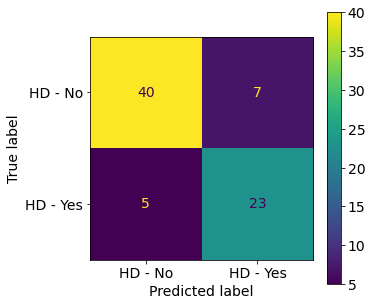

In [77]:
# Plot Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 14})
plot_confusion_matrix(clf_dt_prun_0, X_test, y_test, display_labels = ["HD - No","HD - Yes"], cmap = 'viridis', ax = ax)
plt.show()

In the above confusion matrix:  
- *40 + 7 = 47* patients did not have Heart Disease and *40 (85.10%) were correctly classified*  
- *5 + 23 = 28* patients did have Heart Disease and *23 (82.14%) were correctly classified*  

We can see from the above result that:
- pruned tree did a better job in classifying patients compared the original full size tree that we built earlier
- accuracy for patients *without Heart Disease* improved from *74.46% to 85.10%* which is an improvement of more than 10%
- accuracy for patients *with Heart Disease* did not change which is *82.14%* which is already good in the first place


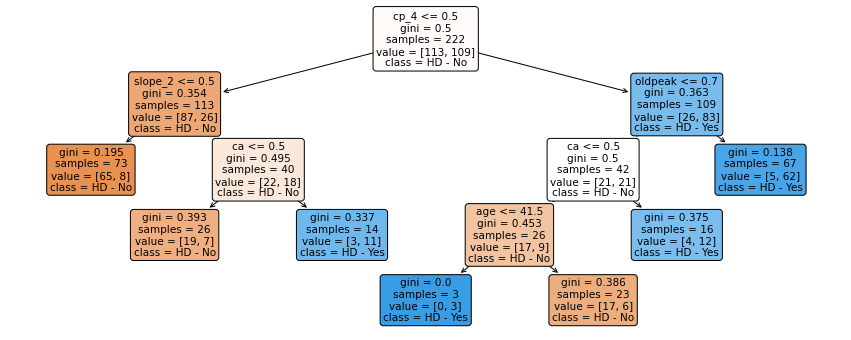

In [80]:
# Plot the pruned Tree
plt.figure(figsize = (15, 6))
plot_tree(clf_dt_prun_0, filled = True, rounded = True, class_names = ['HD - No','HD - Yes'],
          feature_names = X_encoded.columns)
plt.show()

The above pruned tree (*with ideal_ccp_alpha[0]*) is much smaller and performs better than the original full size tree. The reason for the original tree being so huge is that it overfits the training data.

**Second tree with `ideal_ccp_alpha[1]` value**

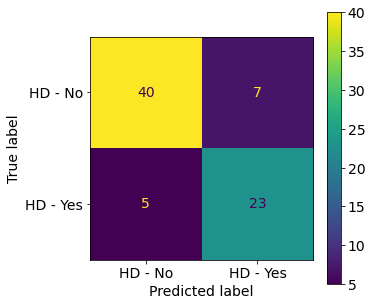

In [81]:
# Build a new Decision Tree based upon the "ideal values of alpha"
clf_dt_prun_1 = DecisionTreeClassifier(random_state = 10, ccp_alpha = ideal_ccp_alpha[1])
# print('clf_dt_prun_1: ', clf_dt_prun, 'ideal_ccp_alpha[0]: ', ideal_ccp_alpha[0])

# Training the tree
clf_dt_prun_1 = clf_dt_prun_1.fit(X_train, y_train)
# print('clf_dt_prun_2: ', clf_dt_prun)

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 14})
plot_confusion_matrix(clf_dt_prun_1, X_test, y_test, display_labels = ["HD - No","HD - Yes"], cmap = 'viridis', ax = ax)
plt.show()

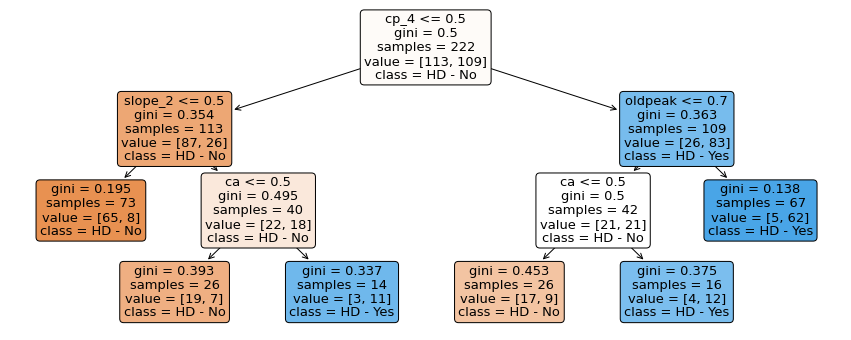

In [82]:
# Plot the pruned Tree
plt.figure(figsize = (15, 6))
plot_tree(clf_dt_prun_1, filled = True, rounded = True, class_names = ['HD - No','HD - Yes'],
          feature_names = X_encoded.columns)
plt.show()

The above pruned tree (*with ideal_ccp_alpha[1]*) is even smaller than previous tree (*with ideal_ccp_alpha[0]*) and also performs better than the original full size tree. The reason for the original tree being so huge is that it overfits the training data.

**Comments about 2 values of ccp_alpha**

- We have 2 values of ccp_alpha, `ideal_ccp_alpha[0] = 0.012859` and `ideal_ccp_alpha[1] = 0.013062`. 
- There is no difference in the accuracies of 2 trees built with the 2 different values of `ideal_ccp_alpha`.
- Accuracy mean (*Accuracy_mean*) and standard deviation (*std*) are exactly the same for both values of ideal_ccp_alpha. 
- *ideal_ccp_alpha[1]* has a smaller tree than the *ideal_ccp_alpha[0]*. 
 
From the above points we can conclude that in the similar situations, we should choose the higher ccp_alpha value to build our tree.

#### Interpret the tree

Each node represents the following info. As an example, I will use the root node.

cp_4 <= 0.5
- Column name to split the values, it is cp_4 in this node
- Column values <= 0.5 go to left of the tree and those of > 0.5 go to right

gini = 0.5
- gini index for the node

samples = 222
- Number of samples used in the node

value = [113, 109]
- Number of classifications in the node; 113 patients do not have heart disease and 109 have heart disease

class = HD - No
- The majotiry category in the node. In this node the majority is 113 (patients with no heart disease), so the class is "HD - No".

Each node is colored per the majority. Majority with no heart disease nodes are brown and majority with heart disease nodes are blue.

The colors also have different shades. Darker color has a lower gini impurity than a ligher color. Root (HD - No) has a gini impurity of 0.50 and is almost white while the leftmost node (HD - No) has a gini impurity of 0.195 and is the darkest brown in the whole tree. The same goes for the blue shade (HD - Yes) as well.

Leaves do not have column names because they are the last (lowest) ones in the tree and no longer splitting the data.

In [ ]:
    Buid tree
    Draw tree
    Interpret
    Evaluate the Final Decision